## Import Basic Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

## Read the Data

In [37]:
df=pd.read_csv('insurance_renewal.csv')

In [38]:
df.shape

(9134, 23)

In [39]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,32,5,0,1,Corporate Auto,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,13,42,0,8,Personal Auto,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,18,38,0,2,Personal Auto,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,18,65,0,7,Corporate Auto,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,12,44,0,1,Personal Auto,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [40]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

#### How many rows have missing ID?

In [41]:

df['Customer'].isnull().sum()

0

#### Missing values

In [42]:
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

#### Drop ID Feature

In [43]:
df.drop(['Customer'],axis=1,inplace=True)

In [44]:
#Drop the Effective To Date feature since we have 'Months Since Policy Inception' and since a kaggle data,date's not useful

df.drop(['Effective To Date'],axis=1,inplace=True)


In [45]:
#labelling target variable

df['Target']=np.where(df['Response']=='Yes',1,0)
df.drop(['Response'],axis=1,inplace=True)

## Defining Target and Independent Varibales

In [46]:
Y=df[['Target']]
X=df.drop(['Target'],axis=1)

#### Get the baseline renewal rate

In [47]:
Y.mean()

Target    0.143201
dtype: float64

### Split Feature into numerical and Categorical

In [48]:
num=X.select_dtypes(include='number')
char=X.select_dtypes(include='object')

In [49]:
num.head()  # no indicator features in numerical features

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [51]:
# function to find out the distinct value counts of the numerical features
def unique_level(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x: unique_level(x)))

In [53]:
df_value_counts.columns=['feature_levels']
df_value_counts

,feature_levels
Customer Lifetime Value,8041
Income,5694
Monthly Premium Auto,202
Months Since Last Claim,36
Months Since Policy Inception,100
Number of Open Complaints,6
Number of Policies,9
Total Claim Amount,5106


In [54]:
# Here we see than number of open complaints and number of policies are very less. Even less than 10.
# Which means we will not be able to even create deciles further ahead in our analysis.

#so we will consider these two features with less than 20 levels as categorical, while others as numerical

slice1=df_value_counts.loc[df_value_counts['feature_levels']<=20]  #taking all with level less than = 20
cat_list=slice1.index  # taking the column names
cat=num.loc[:,cat_list].astype("object")  # pulling select columns & converting those numerical features to object


In [65]:
cat.head()

,Number of Open Complaints,Number of Policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


In [62]:
slice2=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice2.index
num=num.loc[:,num_list]

In [64]:
num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879


In [67]:
#### Combining the new categorical objects with the original categorical features

char=pd.concat([char,cat],axis=1,join='inner')

## Outlier analysis of Numerical Features

In [71]:
num.describe(percentiles=[0.01,0.10,0.25,0.50,0.75,0.90,0.99])

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.099007
1%,2230.433731,0.000000,61.000000,0.000000,1.000000,10.402835
10%,2661.757835,0.000000,64.000000,2.000000,10.000000,104.084855
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
90%,15433.385306,82103.500000,129.000000,30.000000,87.000000,773.433503


## Capping and flooring outliers

In [72]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return x

In [73]:
num=num.apply(lambda x:outlier_cap(x))

In [74]:
num.describe(percentiles=[0.01,0.10,0.25,0.50,0.75,0.90,0.99])

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,7913.817819,37645.405877,92.922448,15.097000,48.065141,430.551380
std,6344.938386,30355.858544,33.020850,10.073257,27.875048,273.819399
min,2230.433731,0.000000,61.000000,0.000000,1.000000,10.402835
1%,2230.539986,0.000000,61.000000,0.000000,1.000000,10.409413
10%,2661.757835,0.000000,64.000000,2.000000,10.000000,104.084855
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,547.514839
90%,15433.385306,82103.500000,129.000000,30.000000,87.000000,773.433503


### Missing value analysis: Numerical

In [75]:
num.isna().sum()

Customer Lifetime Value          0
Income                           0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Total Claim Amount               0
dtype: int64

###### Missing Value Handling - Numerical Features (Imputation with Mean)

In [ ]:
# We are not performing this step as there is no missing values

### Missing value analysis: Categorical

In [76]:
char.isnull().sum()

State                        0
Coverage                     0
Education                    0
EmploymentStatus             0
Gender                       0
Location Code                0
Marital Status               0
Policy Type                  0
Renew Offer Type             0
Sales Channel                0
Vehicle Class                0
Vehicle Size                 0
Number of Open Complaints    0
Number of Policies           0
dtype: int64

###### Missing Value Handling - Categorical Features (Imputation with Mode)

In [ ]:
# We are not performing this step as there is no missing values

## Feature Selection: Numerical Features

### Part 1: Remove Features with Zero Variance

In [78]:
from sklearn.feature_selection import VarianceThreshold

varselector=VarianceThreshold(threshold=0)
varselector.fit_transform(num)

# get columns to keep and create new dataframe from those columns only
cols=varselector.get_support(indices=True)
num1=num.iloc[:,cols]

In [79]:
num1.dtypes
#no columns are dropped

Customer Lifetime Value          float64
Income                           float64
Monthly Premium Auto             float64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Total Claim Amount               float64
dtype: object

### Part 2: Bivariate Analysis (Feature Discretization)

In [82]:
from sklearn.preprocessing import KBinsDiscretizer

discrete=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num1),index=num1.index,columns=num1.columns).add_suffix('Rank')
num_binned.head()

,Customer Lifetime ValueRank,IncomeRank,Monthly Premium AutoRank,Months Since Last ClaimRank,Months Since Policy InceptionRank,Total Claim AmountRank
0,1.0,4.0,2.0,9.0,0.0,5.0
1,5.0,0.0,6.0,4.0,4.0,9.0
2,8.0,4.0,7.0,6.0,4.0,7.0
3,6.0,0.0,7.0,6.0,6.0,7.0
4,1.0,3.0,4.0,4.0,4.0,1.0


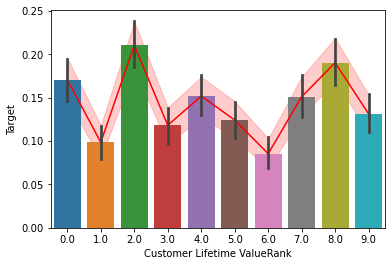

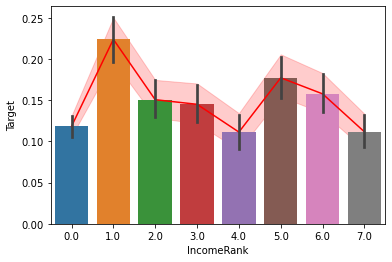

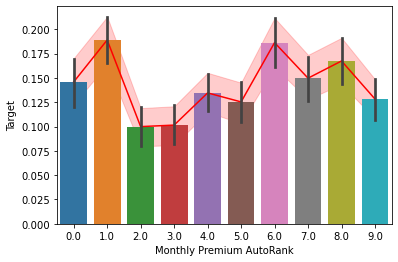

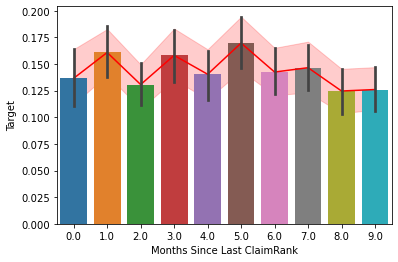

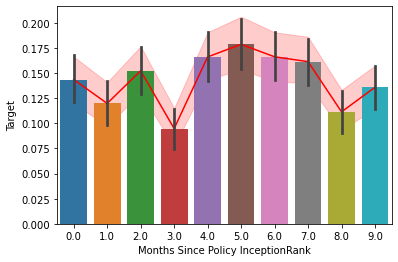

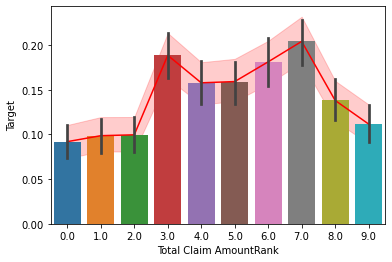

In [85]:
#Check if the features show a slope at all
#If they do, then do you see some deciles below the population average and some higher than population average?
#If that is the case then the slope will be strong
#Conclusion: A strong slope is indicative of the features' ability to discriminate the event from non event
#            making it a good predictor

#percentage_income_goesinto_intallments=Insallment/annual_inc (Derived Variables/Feature Engineering)

X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in num_binned.columns:
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Target'],data=X_bin_combined,color='red')
    sns.barplot(x=col,y="Target",data=X_bin_combined,estimator=mean)
    

### Part 3: Select K Best

In [90]:
from sklearn.feature_selection import SelectKBest, chi2

selector=SelectKBest(chi2,k=4)
selector.fit_transform(num1,Y)

#Get columns to keep and create new dataframe with those only
cols=selector.get_support(indices=True)
selected_features_num=num1.iloc[:,cols]

In [91]:
selected_features_num

,Customer Lifetime Value,Income,Months Since Last Claim,Total Claim Amount
0,2763.519279,56274.0,32,384.811147
1,6979.535903,0.0,13,1131.464935
2,12887.431650,48767.0,18,566.472247
3,7645.861827,0.0,18,529.881344
4,2813.692575,43836.0,12,138.130879
...,...,...,...,...
9129,23405.987980,71941.0,18,198.234764
9130,3096.511217,21604.0,14,379.200000
9131,8163.890428,0.0,9,790.784983
9132,7524.442436,21941.0,34,691.200000


## Feature Selection: Categorical Features

### Part 1: Bivariate Analysis

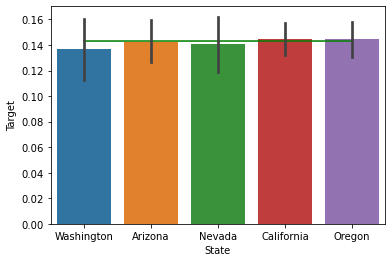

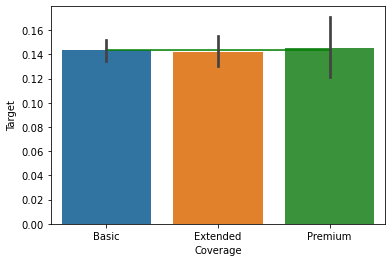

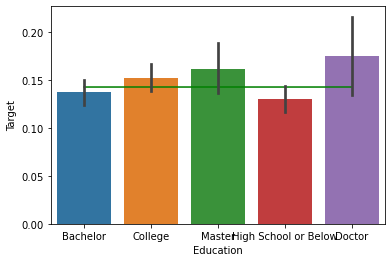

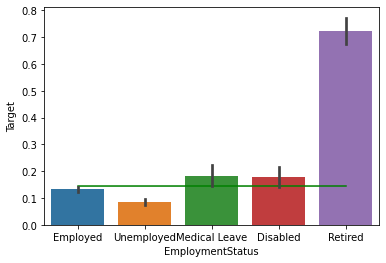

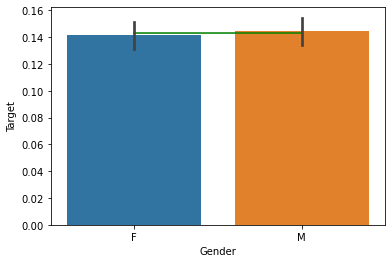

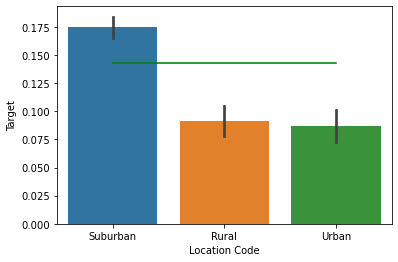

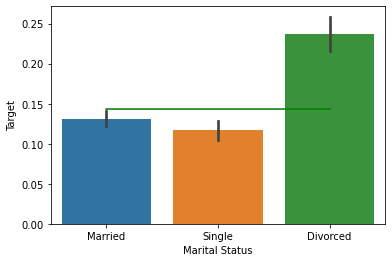

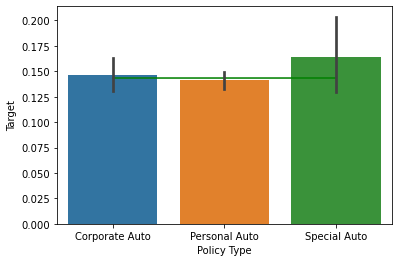

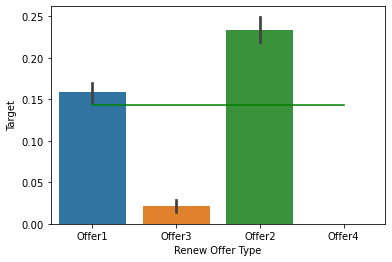

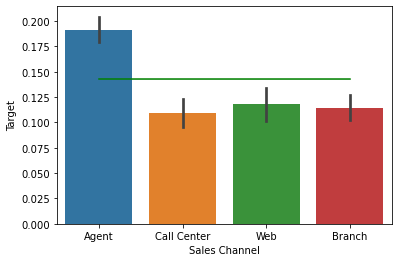

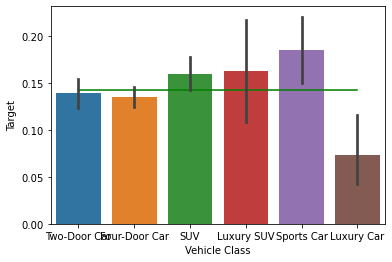

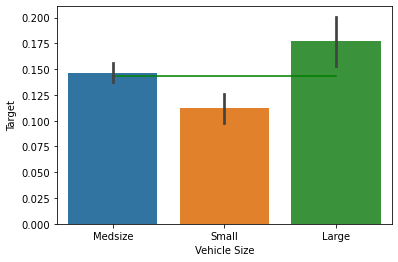

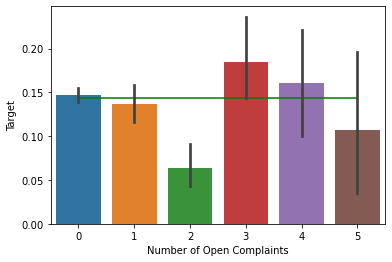

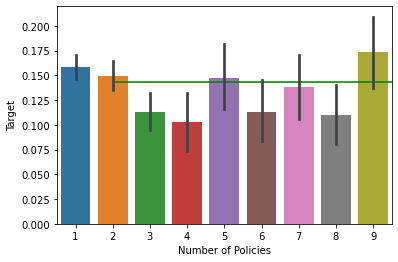

In [93]:

X_char_merged=pd.concat([Y,char],axis=1,join='inner')

from numpy import mean

for cols in char:
    plt.figure()
    sns.lineplot(x=cols,y=X_char_merged['Target'].mean(),data=X_char_merged,color='green')
    sns.barplot(x=cols,y="Target",data=X_char_merged,estimator=mean)

#### Dropping features based on bivariate analysis

In [94]:
# From the above we can drop features that don't have a good dicriminating power

char_drop_list=['State','Coverage','Education','Gender','Policy Type','Number of Policies']
char1=char.drop(char_drop_list,axis=1)

#### Create Dummy features with n-1 level

In [97]:
X_char_dum=pd.get_dummies(char1,drop_first=True)
X_char_dum.shape

(9134, 26)

### Part 2: Select K-Best

In [99]:
from sklearn.feature_selection import SelectKBest,chi2
selector=SelectKBest(chi2,k=24)
selector.fit_transform(X_char_dum,Y)

# Get columns to keep and create new dataframe with those only
cols=selector.get_support(indices=True)
selected_features_char=X_char_dum.iloc[:,cols]

In [100]:
selected_features_char

,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Renew Offer Type_Offer2,Renew Offer Type_Offer3,...,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Size_Medsize,Vehicle Size_Small,Number of Open Complaints_2,Number of Open Complaints_3,Number of Open Complaints_4,Number of Open Complaints_5
0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,1,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9130,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9131,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
9132,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Creating Master Data set for Model Development

In [101]:
X_all=pd.concat([selected_features_num,selected_features_char],axis=1,join='inner')

## Train Test Split

In [103]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_all,Y,test_size=0.3,random_state=10)

#### Verifying if split is done properly

In [104]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of Training Data (6393, 28)
Shape of Testing Data (2741, 28)
Response Rate in Training Data Target    0.143125
dtype: float64
Response Rate in Testing Data Target    0.143378
dtype: float64


## Model Development

### Logistic Regression

In [105]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=0)

logreg.fit(X_train,y_train)


LogisticRegression(random_state=0)

In [107]:
coeff_df=pd.DataFrame(X_all.columns)
coeff_df.columns=['Features']
coeff_df['Coefficient Estimate']=pd.Series(logreg.coef_[0])
coeff_df

,Features,Coefficient Estimate
0,Customer Lifetime Value,0.000003
1,Income,0.000006
2,Months Since Last Claim,0.006612
3,Total Claim Amount,0.000302
4,EmploymentStatus_Employed,-0.498852
5,EmploymentStatus_Medical Leave,-0.037038
6,EmploymentStatus_Retired,0.704931
7,EmploymentStatus_Unemployed,-1.082730
8,Location Code_Suburban,0.365746
9,Location Code_Urban,-0.518385


### Decision Tree

In [108]:
from sklearn.tree import DecisionTreeClassifier

dtree=DecisionTreeClassifier(criterion='gini',random_state=0)


#### Hyperparameter tuning using GridSearchCV

In [109]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV

param_list={'max_depth':[3,5,6,7],'min_samples_split':[60,80,100,120,140]}
GCV=GridSearchCV(dtree,cv=10,param_grid=param_list,n_jobs=3)
GCV.fit(X_train,y_train)

print("Best Parameters using grid search CV: \n",GCV.best_params_)

Best Parameters using grid search CV: 
 {'max_depth': 7, 'min_samples_split': 60}


In [112]:
dtree=DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=60,random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=60, random_state=0)

### Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',max_depth=7,min_samples_split=60,random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=60, random_state=0)

#### Feature Importance

In [115]:
feature_importances=pd.DataFrame(rf.feature_importances_,
                                index=X_train.columns,
                                columns=['importance']).sort_values('importance',ascending=False)

feature_importances

,importance
EmploymentStatus_Retired,0.316061
Renew Offer Type_Offer2,0.083440
Income,0.081815
Total Claim Amount,0.074224
Renew Offer Type_Offer3,0.071410
Customer Lifetime Value,0.068048
Renew Offer Type_Offer4,0.052992
Location Code_Suburban,0.039032
Months Since Last Claim,0.033522
EmploymentStatus_Unemployed,0.026403


### Gradient Boosting 

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',max_depth=7,min_samples_split=60,random_state=0)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=7, min_samples_split=60,
                           random_state=0)

#### Feature Importance

In [118]:
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                index=X_train.columns,
                                columns=['importance']).sort_values(['importance'],ascending=False)
feature_importances

,importance
Customer Lifetime Value,0.227364
Total Claim Amount,0.173950
Income,0.166091
EmploymentStatus_Retired,0.129891
Months Since Last Claim,0.061009
Renew Offer Type_Offer2,0.048602
Renew Offer Type_Offer3,0.030329
Renew Offer Type_Offer4,0.016542
Vehicle Size_Small,0.016381
Location Code_Suburban,0.016295


## Model Evaluation

In [119]:
y_pred_logreg=logreg.predict(X_test)
y_pred_dtree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [120]:
from sklearn import metrics

In [123]:
def model_evaluation(model,y_pred_model):
    print('Accuracy: ',metrics.accuracy_score(y_test,y_pred_model))
    print('Precision: ',metrics.precision_score(y_test,y_pred_model))
    print('Recall: ',metrics.recall_score(y_test,y_pred_model))
    print('F1-Score: ',metrics.f1_score(y_test,y_pred_model))
    metrics.plot_confusion_matrix(model,X_all,Y)

#### Model Evaluation Logistic Regression

Accuracy:  0.8588106530463334
Precision:  0.65
Recall:  0.03307888040712468
F1-Score:  0.06295399515738498


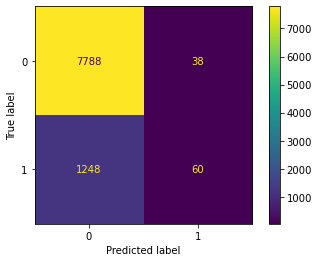

In [124]:

model_evaluation(logreg,y_pred_logreg)

#### Model Evaluation Decision Tree

Accuracy:  0.8766873403867201
Precision:  0.7350427350427351
Recall:  0.21882951653944022
F1-Score:  0.3372549019607843


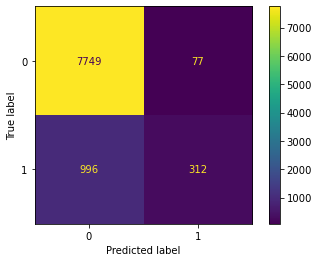

In [125]:
model_evaluation(dtree,y_pred_dtree)

#### Model Evaluation for Random Forest

Accuracy:  0.8708500547245531
Precision:  0.782608695652174
Recall:  0.13740458015267176
F1-Score:  0.2337662337662338


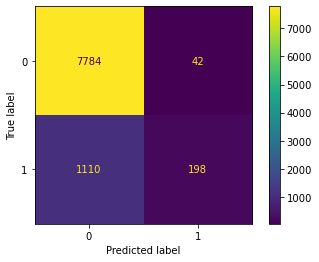

In [126]:
model_evaluation(rf,y_pred_rf)

#### Model Evaluation for GBM

Accuracy:  0.9784750091207588
Precision:  0.946524064171123
Recall:  0.9007633587786259
F1-Score:  0.923076923076923


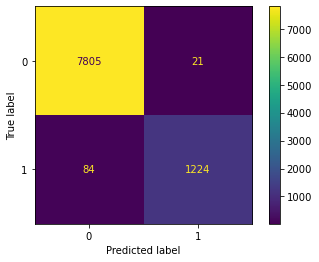

In [127]:
model_evaluation(gbm,y_pred_gbm)

In [ ]:
# Out ofthe above 4 model, clearly GBM stands out as the best, hence we will choose GBM for Lorenz Curve analysis

## Lorenz Curve

In [131]:
y_pred_prob=gbm.predict_proba(X_all)[:,1] #predict probability
#returns two columns, where first column is(non event) for not risky and 2nd column is the actual event,
# hence we  take only 2nd column

df['y_pred_prob']=pd.DataFrame(y_pred_prob) # adding a y_pred column to the original df along side actual Y

df['P_Rank_GBM']=pd.qcut(df['y_pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
#grouping the predicted probability in deciles (1 to 10)



#creating new columns for count and mean and adding in a new df. Count shows the number of rows/records in each decile.
# mean shows the event rate 
# creating for both actual and predicted event rate and renaming it
rank_df_actuals=df.groupby('P_Rank_GBM')['Target'].agg(['count','mean'])
rank_df_predicted=df.groupby('P_Rank_GBM')['y_pred_prob'].agg(['mean'])

rank_df_actuals=pd.DataFrame(rank_df_actuals)
rank_df_actuals.rename(columns={'mean':'Actual_Event_Rate'},inplace=True)

rank_df_predicted=pd.DataFrame(rank_df_predicted)
rank_df_predicted.rename(columns={'mean':'Predicted_Event_Rate'},inplace=True)

# combining both the df for actual and predicted
rank_df=pd.concat([rank_df_actuals,rank_df_predicted],axis=1,join='inner')


#sorting & creating new df based on Rank in desc order
sorted_rank_df=rank_df.sort_values(by='P_Rank_GBM',ascending=False)


# Adding some new calculated columns

#for event
sorted_rank_df['N_events']=rank_df['count']*rank_df['Actual_Event_Rate'] #column to show number of event in each decile
sorted_rank_df['cum_events']=sorted_rank_df['N_events'].cumsum() #cumulative sum of all events
sorted_rank_df['event_cap']=sorted_rank_df['N_events']/max(sorted_rank_df['N_events'].cumsum()) # each event/total event
# above column shows how many percentage of event does the decile account for
sorted_rank_df['cum_event_cap']=sorted_rank_df['event_cap'].cumsum()  # cumulative event rate


#for non event
sorted_rank_df['N_non_events']=sorted_rank_df['count'] - sorted_rank_df['N_events'] 
sorted_rank_df['cum_non_events']=sorted_rank_df['N_non_events'].cumsum() 
sorted_rank_df['event_non_cap']=sorted_rank_df['N_non_events']/max(sorted_rank_df['N_non_events'].cumsum()) 
sorted_rank_df['cum_non_event_cap']=sorted_rank_df['event_non_cap'].cumsum()


sorted_rank_df['KS']=round((sorted_rank_df['cum_event_cap']-sorted_rank_df['cum_non_event_cap']),4)
# named after Kolmogorov–Smirnov test
# KS metrics tells us how similar(closer) or dissimilar(far apart) two distributions are
# for a good model the KS value will maximize between 2nd and 3rd decile because that is where majority of the polulation
# lies which basically means if you go through top 30% of your data, that should account for majority of the events


sorted_rank_df['random_cap']=sorted_rank_df['count']/max(sorted_rank_df['count'].cumsum()) #records % per decile(10% each)
sorted_rank_df['cum_random_cap']=sorted_rank_df['random_cap'].cumsum() # cumulative of the above column (adds up to100%)


sorted_reindexed=sorted_rank_df.reset_index()
sorted_reindexed['Decile']=sorted_reindexed.index+1 # decile number

sorted_reindexed['Lift_over_Avg']=sorted_reindexed['Actual_Event_Rate']/(max(sorted_reindexed['N_events'].cumsum())/max(sorted_reindexed['count'].cumsum()))
sorted_reindexed

,P_Rank_GBM,count,Actual_Event_Rate,Predicted_Event_Rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,event_non_cap,cum_non_event_cap,KS,random_cap,cum_random_cap,Decile,Lift_over_Avg
0,10,914,0.989059,0.804011,904.0,904.0,0.691131,0.691131,10.0,10.0,0.001278,0.001278,0.6899,0.100066,0.100066,1,6.906778
1,9,913,0.442497,0.381088,404.0,1308.0,0.308869,1.000000,509.0,519.0,0.065040,0.066317,0.9337,0.099956,0.200022,2,3.090038
2,8,913,0.000000,0.109762,0.0,1308.0,0.000000,1.000000,913.0,1432.0,0.116662,0.182980,0.8170,0.099956,0.299978,3,0.000000
3,7,914,0.000000,0.064361,0.0,1308.0,0.000000,1.000000,914.0,2346.0,0.116790,0.299770,0.7002,0.100066,0.400044,4,0.000000
4,6,913,0.000000,0.041186,0.0,1308.0,0.000000,1.000000,913.0,3259.0,0.116662,0.416432,0.5836,0.099956,0.500000,5,0.000000
5,5,913,0.000000,0.026105,0.0,1308.0,0.000000,1.000000,913.0,4172.0,0.116662,0.533095,0.4669,0.099956,0.599956,6,0.000000
6,4,914,0.000000,0.016051,0.0,1308.0,0.000000,1.000000,914.0,5086.0,0.116790,0.649885,0.3501,0.100066,0.700022,7,0.000000
7,3,913,0.000000,0.009207,0.0,1308.0,0.000000,1.000000,913.0,5999.0,0.116662,0.766547,0.2335,0.099956,0.799978,8,0.000000
8,2,913,0.000000,0.005159,0.0,1308.0,0.000000,1.000000,913.0,6912.0,0.116662,0.883210,0.1168,0.099956,0.899934,9,0.000000
9,1,914,0.000000,0.002564,0.0,1308.0,0.000000,1.000000,914.0,7826.0,0.116790,1.000000,0.0000,0.100066,1.000000,10,0.000000


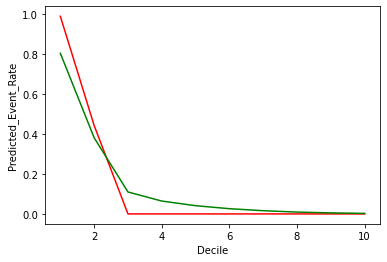

In [132]:
ax=sns.lineplot(x="Decile",y="Actual_Event_Rate",data=sorted_reindexed,color='red')
ax=sns.lineplot(x="Decile",y="Predicted_Event_Rate",data=sorted_reindexed,color='green')

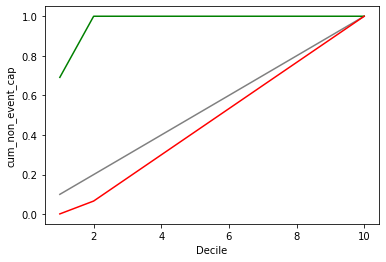

In [133]:
ax=sns.lineplot(x="Decile",y="cum_random_cap",data=sorted_reindexed,color='grey')
ax=sns.lineplot(x="Decile",y="cum_event_cap",data=sorted_reindexed,color='green')
ax=sns.lineplot(x="Decile",y="cum_non_event_cap",data=sorted_reindexed,color='red')
#here we can see that the cumulative event capture rate is very good

#### Summarizing all charts in one

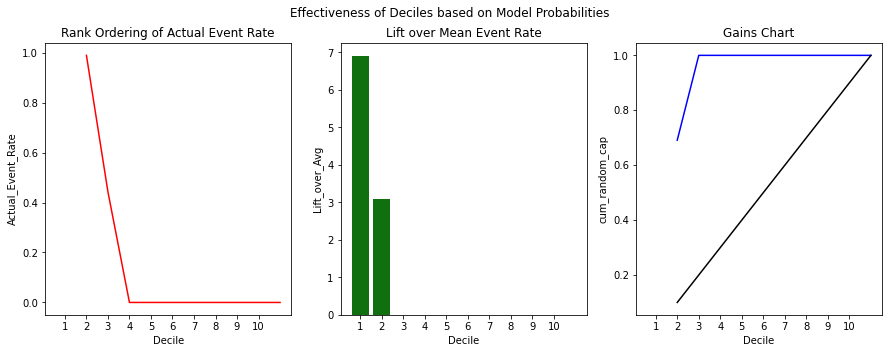

In [136]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(15,5))
fig.suptitle('Effectiveness of Deciles based on Model Probabilities')
axes[0].set_title('Rank Ordering of Actual Event Rate')
axes[1].set_title('Lift over Mean Event Rate')
axes[2].set_title('Gains Chart')
sns.lineplot(ax=axes[0],  x="Decile", y="Actual_Event_Rate", data=sorted_reindexed,color='red')
sns.barplot(ax=axes[1],  x="Decile", y="Lift_over_Avg", data=sorted_reindexed,color='green')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_event_cap", data=sorted_reindexed,color='blue')
sns.lineplot(ax=axes[2],  x="Decile", y="cum_random_cap", data=sorted_reindexed,color='black')
plt.show()

In [ ]:
# Project Conclusion :- 
# The GBM Model has performed the best and we will use that model to build a strategy to target and prioritize 
# Clients for Policy Retention efforts and campaign
# A - Audience
# P - Prirotization
# T - Treatment

## Creating Strategies

In [141]:
## Audience
df['Predicted_Renewal_Rank']=np.where(df['P_Rank_GBM']>8,"Top2","Bottom8")
df.Predicted_Renewal_Rank.value_counts()

Bottom8    7307
Top2       1827
Name: Predicted_Renewal_Rank, dtype: int64

#### Who to focus on

In [142]:
# Keeping only the top2 as they are the audience we need to focus on who are going to renew their insurance

df_top2=df.loc[df['Predicted_Renewal_Rank']=='Top2',:]
df_top2.shape

(1827, 24)

#### What to focus on 

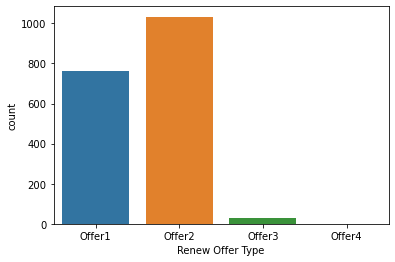

In [143]:
# trying to understand what offers to give.
# for that we will check the renew offer type field

# Treatment Analysis
ax=sns.countplot(x='Renew Offer Type',data=df_top2)

# here we can clearly see that offer 2 is highly preferred, offer 1 is comparatively far better than offer3 and 4

In [153]:
# so we will target the top 2 segments of 1827 clients 
# and try to analyse which offer to give them for them to renew based on their lifetime value




In [146]:
#creating deciles on lifetime values

df['lifetime_value_deciles']=pd.qcut(df['Customer Lifetime Value'].rank(method='first').values,10,duplicates='drop').codes+1

In [147]:
# showing the min max and median of the deciles

df.groupby('lifetime_value_deciles')['Customer Lifetime Value'].agg(['min','max','median'])
#not using mean but using median because these values are not capped so outliers are there

,min,max,median
lifetime_value_deciles,,,
1,1898.007675,2661.729688,2474.707319
2,2661.823510,3443.301126,2891.272351
3,3444.171166,4470.181084,3993.882994
4,4471.747876,5123.484988,4833.257382
5,5123.768112,5780.182197,5426.136238
6,5780.182197,7249.065093,6474.826466
7,7250.029606,8365.677648,7782.012669
8,8365.963454,10208.927610,8962.795984
9,10208.927610,15428.010440,12383.530600


In [148]:
df['Customer Lifetime Value'].median()

# since the median value lies in 6 decilee, we can take 7 and above to identify higher customer life time value

5780.182197

In [149]:
# What to we want to call as Customer High life time value and Customer low life time values

df['lifetime_value_segment']=np.where(df['lifetime_value_deciles']>=7,"High CLTV","Low CLTV")
df.lifetime_value_segment.value_counts()

Low CLTV     5480
High CLTV    3654
Name: lifetime_value_segment, dtype: int64

In [150]:
#crosstab of probabiliteis for lifetime value and renewal offer and identify which offer to give based on lifetime value

pd.crosstab(index=df['lifetime_value_segment'],columns=df['Renew Offer Type'],values=df['y_pred_prob'],aggfunc='mean')

# here we can clearly see that for high CLTV we should prioritize Offer2, however offer 1 has also a good chance
# and for low CLTV we should prioritize Offer 2 as it is considerably higher than offer1 as compared to high cltv

Renew Offer Type,Offer1,Offer2,Offer3,Offer4
lifetime_value_segment,,,,
High CLTV,0.166229,0.217698,0.016692,0.006344
Low CLTV,0.156825,0.243056,0.031386,0.006417


In [152]:
# gives the count of people(audience) to prioritize based on offer ad value

pd.crosstab(index=df['lifetime_value_segment'], columns=df['Renew Offer Type'],values=df['y_pred_prob'],aggfunc='count')

Renew Offer Type,Offer1,Offer2,Offer3,Offer4
lifetime_value_segment,,,,
High CLTV,1737,1015,563,339
Low CLTV,2015,1911,869,685


## Prioritization Result

In [ ]:
# Prioritization Strategy

# Provide Offer 2 to 1015 High CLTV Customers - Phase 1
# Provide Offer 1 to 1737 High CLTV Customers - Phase 2

# Provide Offer 2 to 1911 High CLTV Customers - Phase 3
# Provide Offer 1 to 2015 High CLTV Customers - Phase 4

In [ ]:
# PROJECT CONCLUSION:-

# By leveraging Machine Learning algorithms, we are able carve out a basic strategy that can be used to ehance renewal rates 
# in the Auto Insurance portfolio. For this purpose, we used the APT framework to translate the model output into a strategy